In [1]:
from google.colab import drive 

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My\ Drive/Demand\ Forecasting/

/content/drive/My Drive/Demand Forecasting


In [3]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn import preprocessing

In [4]:
#Load the train and test datasets
train = pd.read_csv('train_DF.csv')
test = pd.read_csv('test_DF.csv')

In [5]:
#Creating a copy of initial datasets
train_copy = train.copy()
test_copy = test.copy()

In [6]:
train.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [7]:
#we have to predict units_sold as it is missing in the test datset
test.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku
0,212645,16/07/13,8091,216418,108.3000,108.3000,0,0
1,212646,16/07/13,8091,216419,109.0125,109.0125,0,0
2,212647,16/07/13,8091,216425,133.9500,133.9500,0,0
3,212648,16/07/13,8091,216233,133.9500,133.9500,0,0
4,212649,16/07/13,8091,217390,176.7000,176.7000,0,0


In [8]:
train.shape, test.shape

((150150, 9), (13860, 8))

In [9]:
#calculate the train-test-split ratio
train.shape[0]/(train.shape[0] + test.shape[0]), test.shape[0]/(train.shape[0] + test.shape[0])

(0.9154929577464789, 0.08450704225352113)

In [10]:
#get info about number of non-null values in columns as well as their datatypes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   week             150150 non-null  object 
 2   store_id         150150 non-null  int64  
 3   sku_id           150150 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150150 non-null  float64
 6   is_featured_sku  150150 non-null  int64  
 7   is_display_sku   150150 non-null  int64  
 8   units_sold       150150 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13860 entries, 0 to 13859
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   record_ID        13860 non-null  int64  
 1   week             13860 non-null  object 
 2   store_id         13860 non-null  int64  
 3   sku_id           13860 non-null  int64  
 4   total_price      13860 non-null  float64
 5   base_price       13860 non-null  float64
 6   is_featured_sku  13860 non-null  int64  
 7   is_display_sku   13860 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 866.4+ KB


In [12]:
#Filling NaN value(s) in the total_price column by base_price
train.total_price=train.total_price.fillna(value=train.base_price)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   week             150150 non-null  object 
 2   store_id         150150 non-null  int64  
 3   sku_id           150150 non-null  int64  
 4   total_price      150150 non-null  float64
 5   base_price       150150 non-null  float64
 6   is_featured_sku  150150 non-null  int64  
 7   is_display_sku   150150 non-null  int64  
 8   units_sold       150150 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


# **Univariate Analysis**
For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable. 

For numerical features, a histogram or a box-plot can be used to look at the distribution of the variable. With a histogram, you can check the central tendency, variability, modality, and kurtosis of a distribution.

In [13]:
train.describe()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
count,150150.000000,150150.000000,150150.000000,150150.000000,150150.000000,150150.000000,150150.000000,150150.000000
mean,106271.555504,9199.422511,254761.132468,206.628502,219.425927,0.095611,0.133200,51.674206
std,61386.037861,615.591445,85547.306447,103.310400,110.961712,0.294058,0.339792,60.207904
min,1.000000,8023.000000,216233.000000,41.325000,61.275000,0.000000,0.000000,1.000000
25%,53111.250000,8562.000000,217217.000000,130.387500,133.237500,0.000000,0.000000,20.000000
50%,106226.500000,9371.000000,222087.000000,198.075000,205.912500,0.000000,0.000000,35.000000
75%,159452.750000,9731.000000,245338.000000,233.700000,234.412500,0.000000,0.000000,62.000000
max,212644.000000,9984.000000,679023.000000,562.162500,562.162500,1.000000,1.000000,2876.000000


By analyzing above statistic, we can notice the huge difference between the mean and max value of units_sold. This shows that **outliers may be present in units_sold**. 
We'll visualize them with plots and remove them.

###**1) Target Variable** (Numerical)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


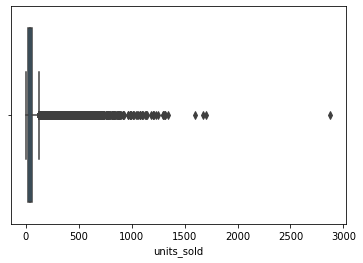

In [14]:
#plotting a boxplot of units sold to check for outliers
sns.boxplot(train['units_sold'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


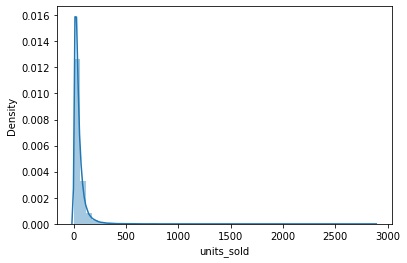

In [15]:
#Visuaizing the units_sold
sns.distplot(train['units_sold'])

It can be inferred that most of the data in the distribution of units_sold is not normally distributed. The distribution is **right-skewed (positive skewness**). 

The boxplot confirms the presence of a lot of outliers/extreme values.

In [16]:
#checking skewness of units_sold column
train['units_sold'].skew()

6.114995824093101

The skewness value of 6.115 shows that the column 'units_sold' has a **right-skewed distribution**, indicating the presence of extreme higher values.

In [17]:
#transforming units_sold column by taking its natura log to reduce skewness and thus reduce effect of outliers
train['units_sold'] = np.log(train['units_sold'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


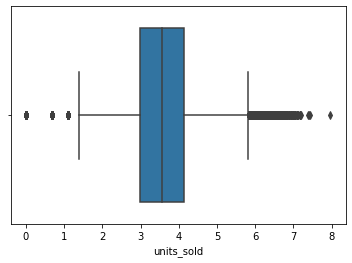

In [18]:
#boxplot on units_sold column
sns.boxplot(train['units_sold'])

By comparing the two boxplots above, we can se that logaritmic transformation helped correct the distribution of units_sold.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


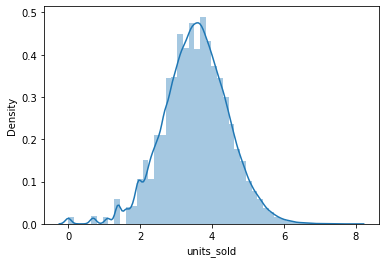

In [19]:
#Visualizing units_sold after logarithmic transformation
sns.distplot(train['units_sold'])

It can be inferred from the above plot that now the data in units_sold is normally distributed.

In [20]:
#checking how skewness of the units_sold column changed after taking log
train['units_sold'].skew()

-0.15863528750872496

Skewness of original data = 6.115  
Skewness after log transformation = -0.159

The **skewness decreased from 6.115 to -0.159**.
The above values represent that the data has been treated for extreme values.


###**2) Independent Variables** (Numerical)
**i) base_price**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


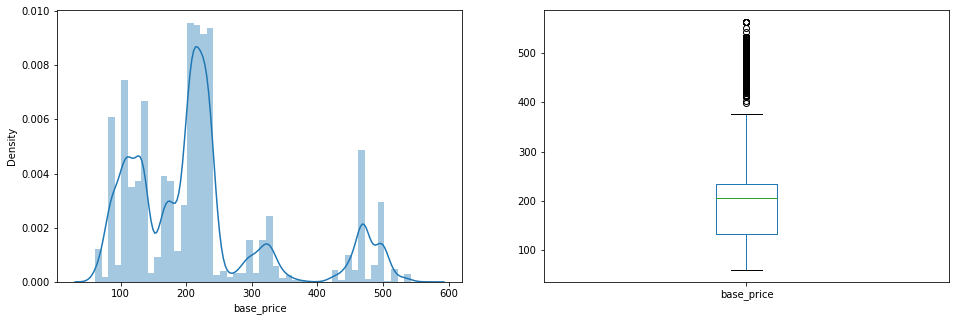

In [21]:
#Visualizing base_price
plt.subplot(121)
sns.distplot(train['base_price'])

plt.subplot(122)
train['base_price'].plot.box(figsize = (16,5))

We see a fairly normal distribution from the plots above.

**ii) total_price**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


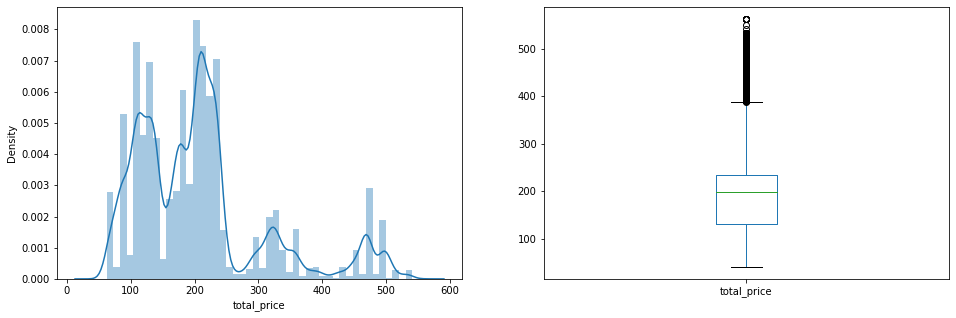

In [22]:
#Visualizing total_price
plt.subplot(121)
sns.distplot(train['total_price'])

plt.subplot(122)
train['total_price'].plot.box(figsize = (16,5))

We see similar fairly normal distribution for the total price.

###**Independent Variables** (Categorical)
**i) is_featured_sku**
**ii) is_display_sku**

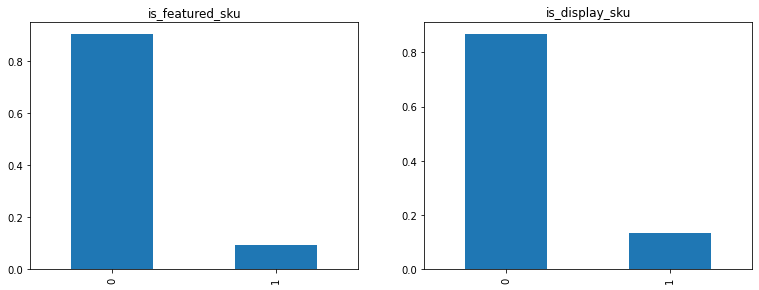

In [23]:
plt.subplot(231)
train['is_featured_sku'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'is_featured_sku')

plt.subplot(232)
train['is_display_sku'].value_counts(normalize=True).plot.bar(title = 'is_display_sku')

It can be inferrred from the above bar plots that:
1. About 10% units which are sold are featured.
2. About 15% units which are sold are on display.

#**Bivariate Analysis**

In [24]:
labels = ["0-1", "1-2", "2-3", "3-4", "4-5", "5-6", "6-7", "7-8"]
train['group']=pd.cut(train['units_sold'], 8, labels=labels)

train['group'].unique()
train.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,group
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,2.995732,3-4
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,3.332205,3-4
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,2.944439,2-3
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,3.784190,3-4
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,3.951244,3-4


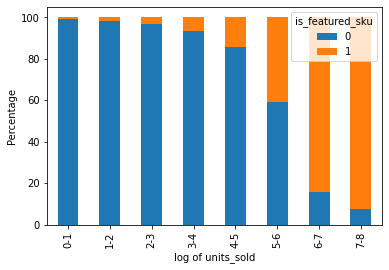

In [25]:
#train.groupby(['group','is_featured_sku']).size().unstack().plot(kind='bar',stacked=True)

train.groupby(['group','is_featured_sku']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.xlabel('log of units_sold')
plt.ylabel('Percentage')

#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

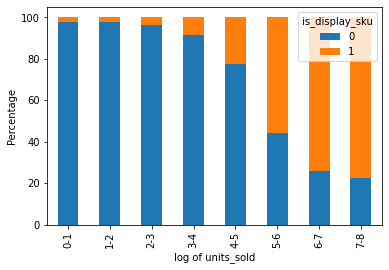

In [26]:
train.groupby(['group','is_display_sku']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.xlabel('log of units_sold')
plt.ylabel('Percentage')
plt.show()

From the above two plots, it can be inferred that


*   Most larger number of units_sold were featured (approx. >90%)
*   Larger number of units sold were on display (approx. 80%)



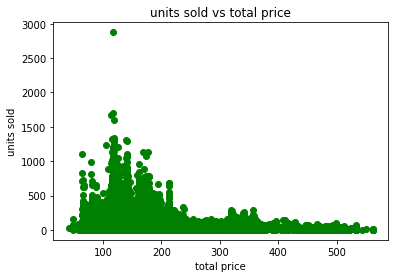

In [27]:

plt.scatter(train.total_price, np.exp(train.units_sold), color='g')
plt.title('units sold vs total price')
plt.xlabel('total price')
plt.ylabel('units sold')


plt.show()

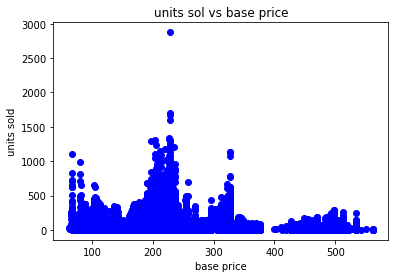

In [28]:
plt.scatter(train.base_price, np.exp(train.units_sold), color='b')
plt.title('units sol vs base price')
plt.xlabel('base price')
plt.ylabel('units sold')

plt.show()

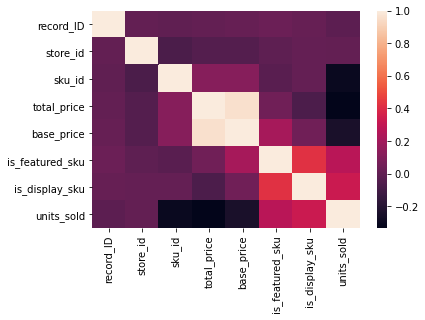

In [29]:
# Calculating and visualizing the correlation matrix
corr=train.corr()
import seaborn as sns
%matplotlib inline
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns)

In [30]:
cmap=sns.diverging_palette(5, 20, as_cmap=True)
def magnify():
  return[dict(selector="th",
              props=[("font-size", "7pt")]),
         dict(selector="th:hover",
              props=[("font-size", "12pt")]),
         dict(selector="tr:hover td:hover",
              props=[('max-width', '200px'),
                     ('font-size', '12pt')])
         ]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magnify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
record_ID,1.00,0.01,-0.00,0.01,0.02,0.03,0.02,-0.01
store_id,0.01,1.00,-0.07,-0.04,-0.04,-0.01,0.01,0.01
sku_id,-0.00,-0.07,1.00,0.12,0.12,-0.02,0.01,-0.30
total_price,0.01,-0.04,0.12,1.00,0.96,0.05,-0.07,-0.33
base_price,0.02,-0.04,0.12,0.96,1.00,0.21,0.05,-0.24
is_featured_sku,0.03,-0.01,-0.02,0.05,0.21,1.00,0.43,0.28
is_display_sku,0.02,0.01,0.01,-0.07,0.05,0.43,1.00,0.33
units_sold,-0.01,0.01,-0.30,-0.33,-0.24,0.28,0.33,1.00


We see that:
*   Correlation coefficient for record_ID and units sold is -0.01 (low as compared to other features)
*   Correlation coefficient for store_id and units sold is 0.01 (low as compared to other features)
*   The most correlated variables with units_sold are: 
    
    1) total_price
    
    2) is_display_sku

#Feature Engineering
**i) Extracting Date, Month and Year from the week column**

As the week is an object column we cannot use in directly in our model.

In [31]:
#Creating new column variables for the date, month and year in our dataset.
traindate=train["week"].str.slice(-8, -6).astype(int)
testdate=test["week"].str.slice(-8, -6).astype(int)

trainmonth=train["week"].str.slice(-5,-3).astype(int)
testmonth=test["week"].str.slice(-5,-3).astype(int)

trainyear=train["week"].str.slice(6, 8).astype(int)
testyear=test["week"].str.slice(6, 8).astype(int)


In [32]:
train['Date']=traindate
test['Date']=testdate

train['Month']=trainmonth
test['Month']=testmonth

test['Year']=testyear
train['Year']=trainyear
train.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,group,Date,Month,Year
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,2.995732,3-4,17,1,11
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,3.332205,3-4,17,1,11
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,2.944439,2-3,17,1,11
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,3.784190,3-4,17,1,11
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,3.951244,3-4,17,1,11


**ii) Making a Price difference percentage column**

In [33]:
test['PercPriceDiff']=test.base_price-test.total_price
train['PercPriceDiff']=train.base_price-train.total_price

test['PercPriceDiff']=test['PercPriceDiff']/test['base_price']
train['PercPriceDiff']=train['PercPriceDiff']/train['base_price']

test['PercPriceDiff']=test['PercPriceDiff']*100
train['PercPriceDiff']=train['PercPriceDiff']*100
train.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,group,Date,Month,Year,PercPriceDiff
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,2.995732,3-4,17,1,11,11.464968
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,3.332205,3-4,17,1,11,0.000000
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,2.944439,2-3,17,1,11,0.000000
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,3.784190,3-4,17,1,11,0.000000
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,3.951244,3-4,17,1,11,0.000000


**iii) Creating a column for overall week number and week number in year** (Training Set)

In [34]:
train['formatted_date']=pd.to_datetime(train['week'], dayfirst=True)
train['week_of_year'] = train.formatted_date.apply(lambda x: x.weekofyear)
train['weekOrdinal']=0
i=train.formatted_date
train['weekOrdinal'] = i.ne(i.shift()).cumsum()
train.tail()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,group,Date,Month,Year,PercPriceDiff,formatted_date,week_of_year,weekOrdinal
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,3.637586,3-4,9,7,13,0.000000,2013-07-09,28,130
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,3.401197,3-4,9,7,13,0.000000,2013-07-09,28,130
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,3.433987,3-4,9,7,13,26.067747,2013-07-09,28,130
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,2.484907,2-3,9,7,13,26.022305,2013-07-09,28,130
150149,212644,09/07/13,9984,679023,234.4125,234.4125,0,0,2.708050,2-3,9,7,13,0.000000,2013-07-09,28,130


**iii) Creating a column for overall week number and week number in year** (Test Set)

In [35]:

test['formatted_date']=pd.to_datetime(test['week'], dayfirst=True)
test['week_of_year'] = test.formatted_date.apply(lambda x: x.weekofyear)

test['weekOrdinal']=130
i=test.formatted_date
test['weekOrdinal'] = i.ne(i.shift()).cumsum()
test['weekOrdinal']=test['weekOrdinal']+130
#Since the training data ended on week 130 and the next week was in the testing data, we added 130 to week ordinal column in test set.
test.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,Date,Month,Year,PercPriceDiff,formatted_date,week_of_year,weekOrdinal
0,212645,16/07/13,8091,216418,108.3000,108.3000,0,0,16,7,13,0.0,2013-07-16,29,131
1,212646,16/07/13,8091,216419,109.0125,109.0125,0,0,16,7,13,0.0,2013-07-16,29,131
2,212647,16/07/13,8091,216425,133.9500,133.9500,0,0,16,7,13,0.0,2013-07-16,29,131
3,212648,16/07/13,8091,216233,133.9500,133.9500,0,0,16,7,13,0.0,2013-07-16,29,131
4,212649,16/07/13,8091,217390,176.7000,176.7000,0,0,16,7,13,0.0,2013-07-16,29,131


**iv) Encoding large values in sku_id**(Using Label Encoder)

In [36]:
#Training set
le = preprocessing.LabelEncoder()
le.fit(train["sku_id"])
train['sku_id'] = le.transform(train["sku_id"])
train.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,group,Date,Month,Year,PercPriceDiff,formatted_date,week_of_year,weekOrdinal
0,1,17/01/11,8091,1,99.0375,111.8625,0,0,2.995732,3-4,17,1,11,11.464968,2011-01-17,3,1
1,2,17/01/11,8091,2,99.0375,99.0375,0,0,3.332205,3-4,17,1,11,0.000000,2011-01-17,3,1
2,3,17/01/11,8091,3,133.9500,133.9500,0,0,2.944439,2-3,17,1,11,0.000000,2011-01-17,3,1
3,4,17/01/11,8091,0,133.9500,133.9500,0,0,3.784190,3-4,17,1,11,0.000000,2011-01-17,3,1
4,5,17/01/11,8091,5,141.0750,141.0750,0,0,3.951244,3-4,17,1,11,0.000000,2011-01-17,3,1


In [37]:
#Test set
#Since we already fir the Label Encoder for trainig set, we need not do it again.
test['sku_id'] = le.transform(test['sku_id'])
test.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,Date,Month,Year,PercPriceDiff,formatted_date,week_of_year,weekOrdinal
0,212645,16/07/13,8091,1,108.3000,108.3000,0,0,16,7,13,0.0,2013-07-16,29,131
1,212646,16/07/13,8091,2,109.0125,109.0125,0,0,16,7,13,0.0,2013-07-16,29,131
2,212647,16/07/13,8091,3,133.9500,133.9500,0,0,16,7,13,0.0,2013-07-16,29,131
3,212648,16/07/13,8091,0,133.9500,133.9500,0,0,16,7,13,0.0,2013-07-16,29,131
4,212649,16/07/13,8091,5,176.7000,176.7000,0,0,16,7,13,0.0,2013-07-16,29,131


**v) Adding mean units sold by a particular store, sku, store & sku.**

In [38]:
#Traininng Set
train['avg_units_sku']=train.groupby('sku_id').units_sold.transform('mean')
train['avg_units_store']=train.groupby('store_id').units_sold.transform('mean')
train['avg_units_store_sku']=train.groupby(['store_id', 'sku_id']).units_sold.transform('mean')
train.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,group,Date,Month,Year,PercPriceDiff,formatted_date,week_of_year,weekOrdinal,avg_units_sku,avg_units_store,avg_units_store_sku
0,1,17/01/11,8091,1,99.0375,111.8625,0,0,2.995732,3-4,17,1,11,11.464968,2011-01-17,3,1,4.179690,3.195118,3.142037
1,2,17/01/11,8091,2,99.0375,99.0375,0,0,3.332205,3-4,17,1,11,0.000000,2011-01-17,3,1,4.027249,3.195118,3.216649
2,3,17/01/11,8091,3,133.9500,133.9500,0,0,2.944439,2-3,17,1,11,0.000000,2011-01-17,3,1,3.251809,3.195118,3.087045
3,4,17/01/11,8091,0,133.9500,133.9500,0,0,3.784190,3-4,17,1,11,0.000000,2011-01-17,3,1,3.685782,3.195118,3.270870
4,5,17/01/11,8091,5,141.0750,141.0750,0,0,3.951244,3-4,17,1,11,0.000000,2011-01-17,3,1,3.821438,3.195118,3.255952


In [39]:
#Test Set
avg_unit_by_sku=train.groupby('sku_id').units_sold.mean().to_frame()
avg_unit_by_store=train.groupby('store_id').units_sold.mean().to_frame()
avg_unit_by_skustore=train.groupby(['sku_id','store_id']).units_sold.mean().to_frame()

test=test.merge(right=avg_unit_by_sku, on='sku_id')
test=test.merge(right=avg_unit_by_store, on='store_id')
test=test.merge(right=avg_unit_by_skustore, on=['sku_id', 'store_id'])

test=test.rename(columns={'units_sold_x':'avg_units_sku', 'units_sold_y':'avg_units_store', 'units_sold':'avg_units_store_sku'})

test.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,Date,Month,Year,PercPriceDiff,formatted_date,week_of_year,weekOrdinal,avg_units_sku,avg_units_store,avg_units_store_sku
0,212645,16/07/13,8091,1,108.3000,108.3000,0,0,16,7,13,0.0,2013-07-16,29,131,4.17969,3.195118,3.142037
1,214284,23/07/13,8091,1,110.4375,110.4375,0,0,23,7,13,0.0,2013-07-23,30,132,4.17969,3.195118,3.142037
2,215921,30/07/13,8091,1,109.0125,109.0125,0,0,30,7,13,0.0,2013-07-30,31,133,4.17969,3.195118,3.142037
3,217558,06/08/13,8091,1,110.4375,110.4375,0,0,6,8,13,0.0,2013-08-06,32,134,4.17969,3.195118,3.142037
4,219198,13/08/13,8091,1,109.0125,109.0125,0,0,13,8,13,0.0,2013-08-13,33,135,4.17969,3.195118,3.142037


**vi) Adding base price grouped by store, sku, store & sku**

In [40]:
#Training Set
train['base_price_sku']=train.groupby('sku_id').base_price.transform('mean')
train['base_price_store']=train.groupby('store_id').base_price.transform('mean')
train['base_price_store_sku']=train.groupby(['sku_id', 'store_id']).base_price.transform('mean')
train.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,group,Date,Month,Year,PercPriceDiff,formatted_date,week_of_year,weekOrdinal,avg_units_sku,avg_units_store,avg_units_store_sku,base_price_sku,base_price_store,base_price_store_sku
0,1,17/01/11,8091,1,99.0375,111.8625,0,0,2.995732,3-4,17,1,11,11.464968,2011-01-17,3,1,4.179690,3.195118,3.142037,94.688268,181.312372,105.800769
1,2,17/01/11,8091,2,99.0375,99.0375,0,0,3.332205,3-4,17,1,11,0.000000,2011-01-17,3,1,4.027249,3.195118,3.216649,94.908763,181.312372,105.839135
2,3,17/01/11,8091,3,133.9500,133.9500,0,0,2.944439,2-3,17,1,11,0.000000,2011-01-17,3,1,3.251809,3.195118,3.087045,128.285210,181.312372,131.204135
3,4,17/01/11,8091,0,133.9500,133.9500,0,0,3.784190,3-4,17,1,11,0.000000,2011-01-17,3,1,3.685782,3.195118,3.270870,128.101871,181.312372,129.916154
4,5,17/01/11,8091,5,141.0750,141.0750,0,0,3.951244,3-4,17,1,11,0.000000,2011-01-17,3,1,3.821438,3.195118,3.255952,158.990538,181.312372,164.439519


In [41]:
# Test Set
test['base_price_sku']=test.groupby('sku_id').base_price.transform('mean')
test['base_price_store']=test.groupby('store_id').base_price.transform('mean')
test['base_price_store_sku']=test.groupby(['sku_id', 'store_id']).base_price.transform('mean')
test.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,Date,Month,Year,PercPriceDiff,formatted_date,week_of_year,weekOrdinal,avg_units_sku,avg_units_store,avg_units_store_sku,base_price_sku,base_price_store,base_price_store_sku
0,212645,16/07/13,8091,1,108.3000,108.3000,0,0,16,7,13,0.0,2013-07-16,29,131,4.17969,3.195118,3.142037,97.838649,187.130208,109.9625
1,214284,23/07/13,8091,1,110.4375,110.4375,0,0,23,7,13,0.0,2013-07-23,30,132,4.17969,3.195118,3.142037,97.838649,187.130208,109.9625
2,215921,30/07/13,8091,1,109.0125,109.0125,0,0,30,7,13,0.0,2013-07-30,31,133,4.17969,3.195118,3.142037,97.838649,187.130208,109.9625
3,217558,06/08/13,8091,1,110.4375,110.4375,0,0,6,8,13,0.0,2013-08-06,32,134,4.17969,3.195118,3.142037,97.838649,187.130208,109.9625
4,219198,13/08/13,8091,1,109.0125,109.0125,0,0,13,8,13,0.0,2013-08-13,33,135,4.17969,3.195118,3.142037,97.838649,187.130208,109.9625


**vii) Adding total_price fouped by store, sku, store & sku**

In [42]:
#Training Set
train['total_price_sku']=train.groupby('sku_id').total_price.transform('mean')
train['total_price_store']=train.groupby('store_id').total_price.transform('mean')
train['total_price_store_sku']=train.groupby(['sku_id', 'store_id']).total_price.transform('mean')
train.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,group,Date,Month,Year,PercPriceDiff,formatted_date,week_of_year,weekOrdinal,avg_units_sku,avg_units_store,avg_units_store_sku,base_price_sku,base_price_store,base_price_store_sku,total_price_sku,total_price_store,total_price_store_sku
0,1,17/01/11,8091,1,99.0375,111.8625,0,0,2.995732,3-4,17,1,11,11.464968,2011-01-17,3,1,4.179690,3.195118,3.142037,94.688268,181.312372,105.800769,91.982702,172.272756,102.117692
1,2,17/01/11,8091,2,99.0375,99.0375,0,0,3.332205,3-4,17,1,11,0.000000,2011-01-17,3,1,4.027249,3.195118,3.216649,94.908763,181.312372,105.839135,92.349162,172.272756,102.473942
2,3,17/01/11,8091,3,133.9500,133.9500,0,0,2.944439,2-3,17,1,11,0.000000,2011-01-17,3,1,3.251809,3.195118,3.087045,128.285210,181.312372,131.204135,125.156355,172.272756,126.671538
3,4,17/01/11,8091,0,133.9500,133.9500,0,0,3.784190,3-4,17,1,11,0.000000,2011-01-17,3,1,3.685782,3.195118,3.270870,128.101871,181.312372,129.916154,124.942208,172.272756,126.167308
4,5,17/01/11,8091,5,141.0750,141.0750,0,0,3.951244,3-4,17,1,11,0.000000,2011-01-17,3,1,3.821438,3.195118,3.255952,158.990538,181.312372,164.439519,150.867334,172.272756,152.968269


In [43]:
#Test Set
test['total_price_sku']=test.groupby('sku_id').total_price.transform('mean')
test['total_price_store']=test.groupby('store_id').total_price.transform('mean')
test['total_price_store_sku']=test.groupby(['sku_id', 'store_id']).total_price.transform('mean')

test.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,Date,Month,Year,PercPriceDiff,formatted_date,week_of_year,weekOrdinal,avg_units_sku,avg_units_store,avg_units_store_sku,base_price_sku,base_price_store,base_price_store_sku,total_price_sku,total_price_store,total_price_store_sku
0,212645,16/07/13,8091,1,108.3000,108.3000,0,0,16,7,13,0.0,2013-07-16,29,131,4.17969,3.195118,3.142037,97.838649,187.130208,109.9625,96.319347,180.678125,109.9625
1,214284,23/07/13,8091,1,110.4375,110.4375,0,0,23,7,13,0.0,2013-07-23,30,132,4.17969,3.195118,3.142037,97.838649,187.130208,109.9625,96.319347,180.678125,109.9625
2,215921,30/07/13,8091,1,109.0125,109.0125,0,0,30,7,13,0.0,2013-07-30,31,133,4.17969,3.195118,3.142037,97.838649,187.130208,109.9625,96.319347,180.678125,109.9625
3,217558,06/08/13,8091,1,110.4375,110.4375,0,0,6,8,13,0.0,2013-08-06,32,134,4.17969,3.195118,3.142037,97.838649,187.130208,109.9625,96.319347,180.678125,109.9625
4,219198,13/08/13,8091,1,109.0125,109.0125,0,0,13,8,13,0.0,2013-08-13,33,135,4.17969,3.195118,3.142037,97.838649,187.130208,109.9625,96.319347,180.678125,109.9625


**ix) units_sold in each week of the year**

In [44]:
#Training Set
train['avg_units_week_of_year']=train.groupby('week_of_year')['units_sold'].transform('mean')

train.head()


,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,group,Date,Month,Year,PercPriceDiff,formatted_date,week_of_year,weekOrdinal,avg_units_sku,avg_units_store,avg_units_store_sku,base_price_sku,base_price_store,base_price_store_sku,total_price_sku,total_price_store,total_price_store_sku,avg_units_week_of_year
0,1,17/01/11,8091,1,99.0375,111.8625,0,0,2.995732,3-4,17,1,11,11.464968,2011-01-17,3,1,4.179690,3.195118,3.142037,94.688268,181.312372,105.800769,91.982702,172.272756,102.117692,3.656895
1,2,17/01/11,8091,2,99.0375,99.0375,0,0,3.332205,3-4,17,1,11,0.000000,2011-01-17,3,1,4.027249,3.195118,3.216649,94.908763,181.312372,105.839135,92.349162,172.272756,102.473942,3.656895
2,3,17/01/11,8091,3,133.9500,133.9500,0,0,2.944439,2-3,17,1,11,0.000000,2011-01-17,3,1,3.251809,3.195118,3.087045,128.285210,181.312372,131.204135,125.156355,172.272756,126.671538,3.656895
3,4,17/01/11,8091,0,133.9500,133.9500,0,0,3.784190,3-4,17,1,11,0.000000,2011-01-17,3,1,3.685782,3.195118,3.270870,128.101871,181.312372,129.916154,124.942208,172.272756,126.167308,3.656895
4,5,17/01/11,8091,5,141.0750,141.0750,0,0,3.951244,3-4,17,1,11,0.000000,2011-01-17,3,1,3.821438,3.195118,3.255952,158.990538,181.312372,164.439519,150.867334,172.272756,152.968269,3.656895


In [45]:
#Test Set
avg_units_week_of_year =train.groupby('week_of_year').units_sold.mean().to_frame()
test=test.merge(right=avg_units_week_of_year, on='week_of_year')

test=test.rename(columns={'units_sold':'avg_units_week_of_year'})

test.tail()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,Date,Month,Year,PercPriceDiff,formatted_date,week_of_year,weekOrdinal,avg_units_sku,avg_units_store,avg_units_store_sku,base_price_sku,base_price_store,base_price_store_sku,total_price_sku,total_price_store,total_price_store_sku,avg_units_week_of_year
13855,231268,01/10/13,9178,7,190.9500,190.9500,0,0,1,10,13,0.0,2013-10-01,40,142,4.291881,3.124687,3.626351,203.775000,230.167188,187.387500,198.858750,223.705208,187.387500,3.563236
13856,231272,01/10/13,9178,13,213.0375,213.0375,0,0,1,10,13,0.0,2013-10-01,40,142,3.842710,3.124687,3.999651,227.325728,230.167188,211.909375,226.486344,223.705208,211.909375,3.563236
13857,231273,01/10/13,9178,12,212.3250,212.3250,0,0,1,10,13,0.0,2013-10-01,40,142,3.614987,3.124687,3.686070,226.783836,230.167188,211.493750,209.858890,223.705208,196.650000,3.563236
13858,231271,01/10/13,9178,11,239.4000,228.0000,0,1,1,10,13,-5.0,2013-10-01,40,142,3.695035,3.124687,2.027743,254.662817,230.167188,233.700000,254.227400,223.705208,235.125000,3.563236
13859,231276,01/10/13,9178,14,391.1625,391.1625,1,0,1,10,13,0.0,2013-10-01,40,142,3.143449,3.124687,2.698444,437.960205,230.167188,404.462500,392.297119,223.705208,387.421875,3.563236


In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   record_ID               150150 non-null  int64         
 1   week                    150150 non-null  object        
 2   store_id                150150 non-null  int64         
 3   sku_id                  150150 non-null  int64         
 4   total_price             150150 non-null  float64       
 5   base_price              150150 non-null  float64       
 6   is_featured_sku         150150 non-null  int64         
 7   is_display_sku          150150 non-null  int64         
 8   units_sold              150150 non-null  float64       
 9   group                   150150 non-null  category      
 10  Date                    150150 non-null  int64         
 11  Month                   150150 non-null  int64         
 12  Year                    150150

In [50]:
corr=train.corr()
corr
# sns.heatmap(corr, 
#             xticklabels=corr.columns,
#             yticklabels=corr.columns);

cmap=sns.diverging_palette(5, 20, as_cmap=True)
def magnify():
  return[dict(selector="th",
              props=[("font-size", "7pt")]),
         dict(selector="th:hover",
              props=[("font-size", "12pt")]),
         dict(selector="tr:hover td:hover",
              props=[('max-width', '200px'),
                     ('font-size', '12pt')])
         ]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magnify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,Date,Month,Year,PercPriceDiff,week_of_year,weekOrdinal,avg_units_sku,avg_units_store,avg_units_store_sku,base_price_sku,base_price_store,base_price_store_sku,total_price_sku,total_price_store,total_price_store_sku,avg_units_week_of_year
record_ID,1.00,0.01,-0.00,0.01,0.02,0.03,0.02,-0.01,-0.05,0.07,0.93,0.00,0.07,1.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.01
store_id,0.01,1.00,-0.06,-0.04,-0.04,-0.01,0.01,0.01,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.07,0.03,0.01,-0.04,-0.26,-0.04,-0.04,-0.26,-0.04,0.00
sku_id,-0.00,-0.06,1.00,0.44,0.46,0.09,0.02,-0.31,-0.00,0.00,-0.00,0.10,0.00,0.00,-0.61,0.09,-0.40,0.47,0.15,0.46,0.47,0.15,0.46,-0.00
total_price,0.01,-0.04,0.44,1.00,0.96,0.05,-0.07,-0.33,0.00,-0.00,0.01,-0.08,-0.00,0.01,-0.48,0.07,-0.30,0.95,0.15,0.96,0.96,0.15,0.96,-0.02
base_price,0.02,-0.04,0.46,0.96,1.00,0.21,0.05,-0.24,-0.00,0.01,0.02,0.18,0.01,0.02,-0.49,0.07,-0.31,0.99,0.15,0.99,0.99,0.15,0.99,-0.00
is_featured_sku,0.03,-0.01,0.09,0.05,0.21,1.00,0.43,0.28,-0.00,-0.00,0.03,0.55,-0.00,0.03,-0.07,-0.01,-0.05,0.22,0.02,0.22,0.22,0.02,0.21,0.08
is_display_sku,0.02,0.01,0.02,-0.07,0.05,0.43,1.00,0.33,-0.00,-0.05,0.04,0.38,-0.05,0.02,0.01,0.07,0.08,0.04,0.04,0.05,0.04,0.03,0.04,0.06
units_sold,-0.01,0.01,-0.31,-0.33,-0.24,0.28,0.33,1.00,-0.00,0.00,-0.01,0.30,0.00,-0.01,0.51,0.37,0.77,-0.25,0.18,-0.24,-0.26,0.17,-0.24,0.11
Date,-0.05,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,1.00,-0.04,-0.07,-0.01,0.05,-0.05,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.01
Month,0.07,0.00,0.00,-0.00,0.01,-0.00,-0.05,0.00,-0.04,1.00,-0.31,0.01,1.00,0.07,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.02


In [ ]:
X_train = train.drop(["units_sold", "week", "record_ID", "Date", "formatted_date","Year", "group"], axis=1)

Y_train = train["units_sold"]
X_test  = test.drop([ "week", "record_ID", "Date", "formatted_date", "Year"], axis=1).copy()

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13860 entries, 0 to 13859
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   store_id                13860 non-null  int64  
 1   sku_id                  13860 non-null  int64  
 2   total_price             13860 non-null  float64
 3   base_price              13860 non-null  float64
 4   is_featured_sku         13860 non-null  int64  
 5   is_display_sku          13860 non-null  int64  
 6   Month                   13860 non-null  int64  
 7   PercPriceDiff           13860 non-null  float64
 8   week_of_year            13860 non-null  int64  
 9   weekOrdinal             13860 non-null  int64  
 10  avg_units_sku           13860 non-null  float64
 11  avg_units_store         13860 non-null  float64
 12  avg_units_store_sku     13860 non-null  float64
 13  base_price_sku          13860 non-null  float64
 14  base_price_store        13860 non-null

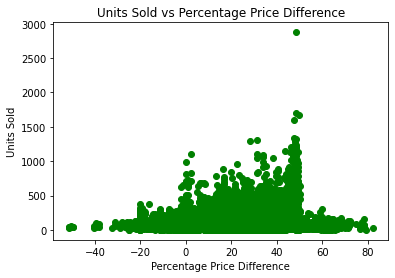

In [ ]:
plt.scatter(train.PercPriceDiff, np.exp(train.units_sold), color='g')
plt.title('Units Sold vs Percentage Price Difference')
plt.ylabel('Units Sold')
plt.xlabel('Percentage Price Difference')

plt.show()

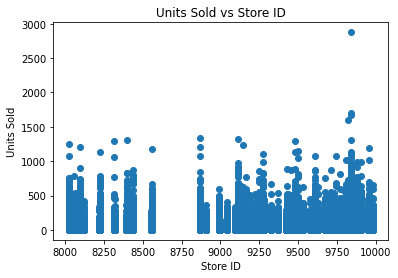

In [ ]:
plt.scatter(train.store_id, np.exp(train.units_sold))
plt.title('Units Sold vs Store ID')
plt.ylabel('Units Sold')
plt.xlabel('Store ID')

plt.show()

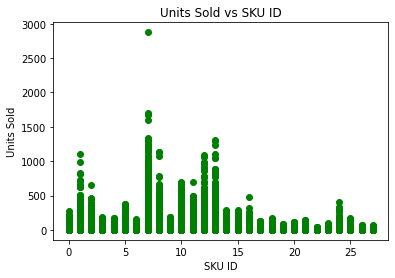

In [ ]:
plt.scatter(train.sku_id, np.exp(train.units_sold), color='g')
plt.title('Units Sold vs SKU ID')
plt.ylabel('Units Sold')
plt.xlabel('SKU ID')

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
xx_train, xx_test, yy_train, yy_test = train_test_split(X_train, Y_train, random_state =0)

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=50, random_state=0, n_estimators=200)
regr.fit(xx_train, yy_train)
yy_pred= regr.predict(xx_test)

In [ ]:
print('Random Forest')
msle = metrics.mean_squared_log_error(np.exp(yy_test), np.exp(yy_pred)) 

print('Mean Absolute Error:', metrics.mean_absolute_error(np.exp(yy_test), np.exp(yy_pred)))
print('Mean Squared Error:', metrics.mean_squared_error(np.exp(yy_test), np.exp(yy_pred)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.exp(yy_test), np.exp(yy_pred))))
print('Mean Squared Log Error: ', msle)
print('R-squared score(test): {:.3f}', metrics.r2_score(np.exp(yy_test), np.exp(yy_pred)))

Random Forest
Mean Absolute Error: 11.461388347923242
Mean Squared Error: 550.6928997373853
Root Mean Squared Error: 23.466846821364506
Mean Squared Log Error:  0.12358821871628478
R-squared score(test): {:.3f} 0.8439002149081866


In [ ]:
#Random Forest Feature Importances
sorted_idx = regr.feature_importances_.argsort()
sorted_idx

array([13, 16,  1, 17, 14, 10,  6, 18, 15,  0, 11,  5,  3,  8,  2, 19,  9,
        7,  4, 12])

Text(0.5, 0, 'Random Forest Feature Importance')

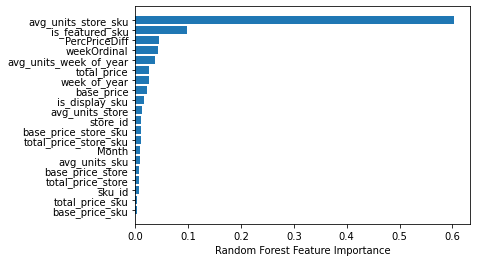

In [ ]:
#Random Forest Feature Importance
sorted_idx = regr.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], regr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [ ]:
#Gradient Boosting

from sklearn import datasets, ensemble
#from sklearn.inspection import permutation_importance

reg = ensemble.GradientBoostingRegressor(n_estimators=200, max_depth=10, min_samples_split=5, learning_rate=0.3, loss='ls')
reg.fit(xx_train, yy_train)

yy_pred_grad=reg.predict(xx_test)

mse = metrics.mean_squared_error(yy_test, reg.predict(xx_test))

In [ ]:
print('Gradient Boosting')
msle_grad = metrics.mean_squared_log_error(np.exp(yy_test), np.exp(yy_pred_grad))

print('Mean Absolute Error:', metrics.mean_absolute_error(np.exp(yy_test), np.exp(yy_pred_grad)))
print("Mean Squared Error: ", metrics.mean_squared_error(np.exp(yy_test), np.exp(yy_pred_grad)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.exp(yy_test), np.exp(yy_pred_grad))))
print('Mean Squared Log Error: ', msle_grad)
print('R-squared score(test): {:.3f}', metrics.r2_score(np.exp(yy_test), np.exp(yy_pred_grad)))

Gradient Boosting
Mean Absolute Error: 10.962119869544676
Mean Squared Error:  462.71869193894344
Root Mean Squared Error: 21.51089705100518
Mean Squared Log Error:  0.11866993080106514
R-squared score(test): {:.3f} 0.8688374438746544


In [ ]:
sorted_idx = reg.feature_importances_.argsort()
sorted_idx

array([16, 13,  6, 14, 17,  0,  1, 10, 11, 18, 15,  8,  3,  5, 19,  2,  9,
        7,  4, 12])

Text(0.5, 0, 'Gradient Boosting Feature Importance')

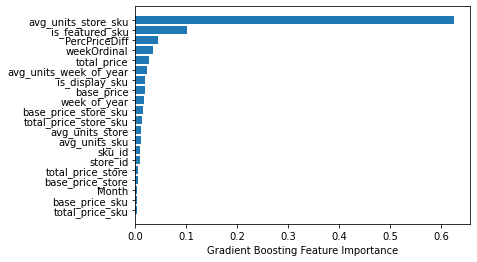

In [ ]:
#Gradient Boosting Feature Importance
sorted_idx = reg.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], reg.feature_importances_[sorted_idx])
plt.xlabel("Gradient Boosting Feature Importance")

In [ ]:
#XGBoost
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(xx_train, yy_train)

xg_yy_pred = xg_reg.predict(xx_test)

[10:04:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print('XG Boost')
msle_xg = metrics.mean_squared_log_error(np.exp(yy_test), np.exp(xg_yy_pred))

print('Mean Absolute Error:', metrics.mean_absolute_error(np.exp(yy_test), np.exp(xg_yy_pred)))
print("Mean Squared Error: ", metrics.mean_squared_error(np.exp(yy_test), np.exp(xg_yy_pred)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.exp(yy_test), np.exp(xg_yy_pred))))
print('Mean Squared Log Error: ', msle_xg)
print('R-squared score(test): {:.3f}', metrics.r2_score(np.exp(yy_test), np.exp(xg_yy_pred)))

XG Boost
Mean Absolute Error: 39.11631826441355
Mean Squared Error:  4618.160878344766
Root Mean Squared Error: 67.95705171904359
Mean Squared Log Error:  1.4237010126502165
R-squared score(test): {:.3f} -0.30906703350055675


In [ ]:
print('Grad Boost')
print('MSLE: ', metrics.mean_squared_log_error(np.exp(yy_test), np.exp(yy_pred_grad)))
print('MSLE: ', metrics.mean_squared_log_error(np.round(np.exp(yy_test)), np.round(np.exp(yy_pred_grad))))

Grad Boost
MSLE:  0.11872108693544613
MSLE:  0.11880885794488948


In [ ]:
yy_pred_grad_sub = reg.predict(X_test)
yy_pred_grad_sub.shape

(13860,)

In [ ]:
submission = pd.DataFrame({
        "record_ID": test["record_ID"],
        "units_sold": np.round(np.exp(yy_pred_grad_sub))
    })
submission.to_csv('DemandF_GradBoosting.csv', index=False)